# Simple Linear Regression

problem statement :

Build a machine learning model to predict salary based on experience for a given dataset
https://drive.google.com/open?id=1UAbkc53H9fpJiEKCUICw1kXsrCdc0uU1


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score


# loading csv data from the file given in the url
salary_data = pd.read_csv("Salary_Data.csv")
#prinding info of data
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### data - pre processing

In [2]:
#looking at top 15 values of data set
salary_data.head(15)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# checking for null values in data set
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
#checking mean max min and other important data from data set
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


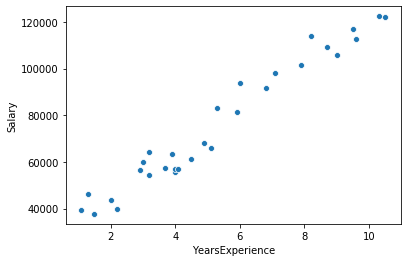

In [5]:
#plotting scatter plot to check for outliers
sea.scatterplot(x = salary_data['YearsExperience'],y =salary_data['Salary'])

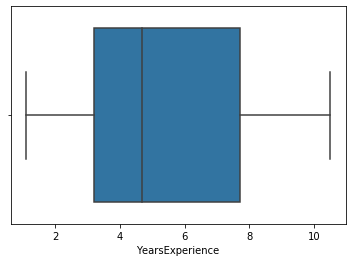

In [6]:
#againg plotting box plot to see the data ranges
sea.boxplot(x = salary_data['YearsExperience'], data = salary_data)

#### Splitting data sets

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(salary_data['YearsExperience'], salary_data['Salary'], train_size=0.75,test_size=0.25, random_state=101)

#### performing linear regression

In [8]:
#converting each set into numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [9]:
# reshaping just to give these values to fit function
X_train = X_train.reshape(-1,1)
X_test  = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

In [10]:
#obtaining an object of linear regression class 
regressor = LinearRegression()  
# calling fit method to perform training
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#retrieving the intercept:
print(regressor.intercept_)
#retrieving the slope:
print(regressor.coef_)

[26492.25813719]
[[9412.64272211]]


##### predicting outputs based on model 

In [12]:
#predicting the output of test data set
y_pred = regressor.predict(X_test)

In [13]:
#predicting the output of train data set
y_pred_train = regressor.predict(X_train)

In [14]:
#calculating different types of errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Mean Absolute Error: 2717.9136363764037
Mean Squared Error: 13336016.519261394
Root Mean Squared Error: 3651.8511085833434


##### plotting regression line for train and test data set

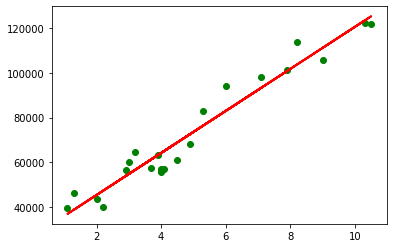

In [15]:
#plotting linear regression line
plt.scatter(X_train, y_train,  color='green')
plt.plot(X_train, y_pred_train, color='red', linewidth=2)
plt.show()

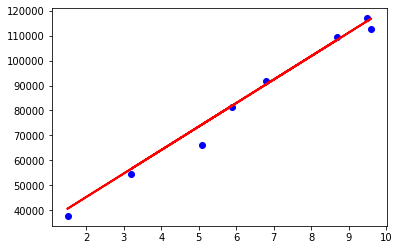

In [16]:
#plotting linear regression line
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

##### determining accuracy  

In [22]:
#determining accuracy of test data sets
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

98.20915410004406 %


In [18]:
#determining accuracy of train data set
accuracy_train = regressor.score(X_train,y_train)
print(accuracy_train*100,'%')

94.46929404015515 %
